In [1]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sippy import functionset as fset
import matplotlib.pyplot as plt

# Data training done using High Frq dataset

In [2]:
from dataPrep import DataPreparation
from modelling import Model

In [3]:
drivingProfile = pd.read_csv('./parameter.csv')
data = pd.read_csv('./HighFrq/HighFrq_input.csv')

In [4]:
dp = DataPreparation(drivingProfile)

In [5]:
data.head()
# data.shape

,Time,Drv_DeltaSteer,Veh_Vx
0,0.000,0.0,19.444444
1,0.005,0.0,19.444285
2,0.010,0.0,19.443796
3,0.015,0.0,19.443005
4,0.020,0.0,19.441990


In [6]:
Time = data['Time'].to_numpy()
deltaSteer = data['Drv_DeltaSteer'].to_numpy()
Vx = data['Veh_Vx'].to_numpy()

In [7]:
print(len(Vx))

4601


In [8]:
[time, output] = dp.getOutput(Time, deltaSteer, Vx)
[time, input] = dp.getInput(Time, deltaSteer, Vx)
output = np.array(output)
input = np.array(input)

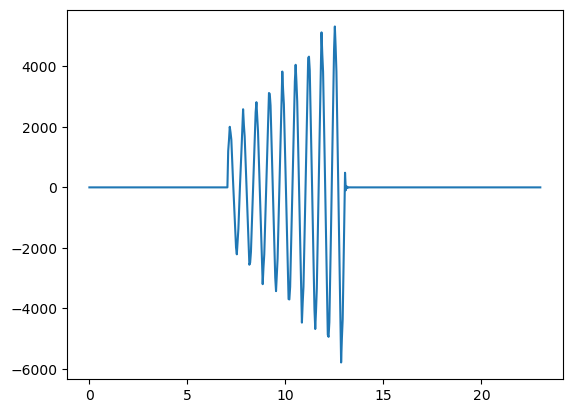

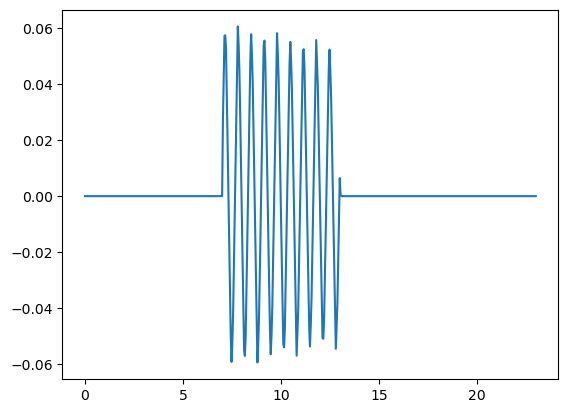

In [9]:
# plt.plot(time, output[0])
plt.plot(time, input[0])
plt.show()
# plt.plot(time, output[1])
plt.plot(time, input[1])

In [10]:
modelObj = Model(input=input, output=output)

In [11]:
[sysId_noised, x_id_noised, y_id_noised, output_noised] = modelObj.model_withNoise(len(input[0]), [0.001, 0.01])

In [12]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised[0], y_id_noised[0])},       MSE: {mean_squared_error(output_noised[0], y_id_noised[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised[1], y_id_noised[1])},       MSE: {mean_squared_error(output_noised[1], y_id_noised[1])}")

For yaw rate :
R2 Score: 0.903151265747005,       MSE: 0.0009516725797754343


For inertial acceleration :
R2 Score: 0.9957360780214753,       MSE: 0.010531821640179767


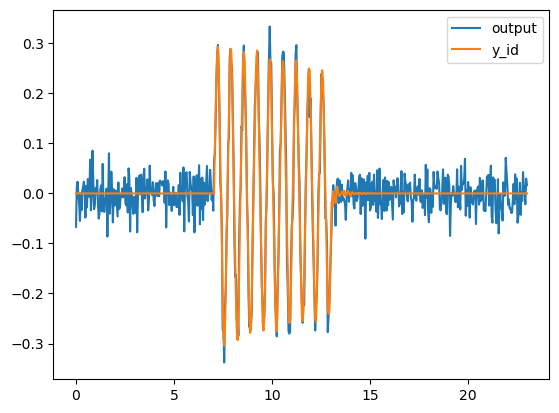

In [13]:
plt.plot(time, output_noised[0])
# plt.show()
plt.plot(time, y_id_noised[0])
plt.legend(['output', 'y_id'])

# Model testing with other datasets

## <span style="color: yellow">SLC</span>

### Data prep and prediction

In [14]:
drivingProfile = pd.read_csv('./parameter.csv')
data_slc = pd.read_csv('./SLC/SLC_input.csv')
data_slc.head()

,time,Drv_DeltaSteer,Veh_Vx
0,0.000,0.0,30.000000
1,0.005,0.0,29.999664
2,0.010,0.0,29.998813
3,0.015,0.0,29.997596
4,0.020,0.0,29.996121


In [15]:
dp_slc = DataPreparation(drivingProfile)

In [16]:
Time_slc = data_slc['time'].to_numpy()
deltaSteer_slc = data_slc['Drv_DeltaSteer'].to_numpy()
Vx_slc = data_slc['Veh_Vx'].to_numpy()

In [17]:
[time_slc, output_slc] = dp_slc.getOutput(Time_slc, deltaSteer_slc, Vx_slc)
[time_slc, input_slc] = dp_slc.getInput(Time_slc, deltaSteer_slc, Vx_slc)

In [18]:
output_slc = np.array(output_slc)
input_slc = np.array(input_slc)

In [19]:
output_noised_slc = output_slc + fset.white_noise_var(len(output_slc[0]), [0.001, 0.01])

In [20]:
x_id_slc, y_id_slc = modelObj.predict(sysId_noised, input_slc)

### Metrics

For yaw rate :
R2 Score: 0.8878084797663299,       MSE: 0.0024295908750604396


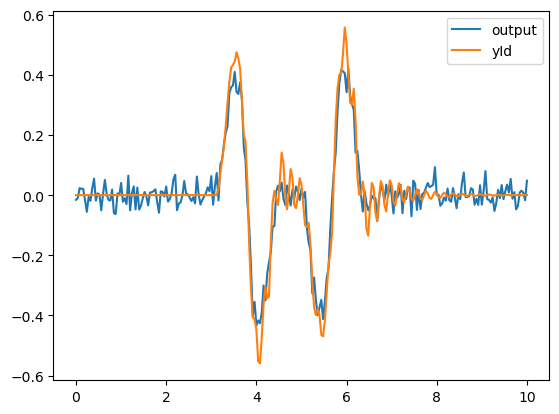

For inertial acceleration :
R2 Score: 0.9926000070178109,       MSE: 0.10819782297819984


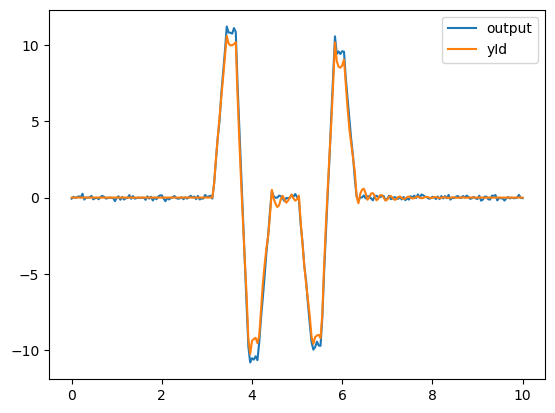

In [21]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_slc[0], y_id_slc[0])},       MSE: {mean_squared_error(output_noised_slc[0], y_id_slc[0])}")
plt.plot(time_slc, output_noised_slc[0])
plt.plot(time_slc, y_id_slc[0])
plt.legend(['output', 'yId'])
plt.show()

print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_slc[1], y_id_slc[1])},       MSE: {mean_squared_error(output_noised_slc[1], y_id_slc[1])}")
plt.plot(time_slc, output_noised_slc[1])
plt.plot(time_slc, y_id_slc[1])
plt.legend(['output', 'yId'])
plt.show()

## <span style="color: cyan">Circular</span>

### Data prep and Prediction

In [22]:
data_circular = pd.read_csv('./Circular/circular_input.csv')
data_circular.head()

,samplingTime,Drv_DeltaSteer,Veh_Vx
0,0.000,0.0,30.000000
1,0.005,0.0,29.999664
2,0.010,0.0,29.998813
3,0.015,0.0,29.997596
4,0.020,0.0,29.996121


In [23]:
Time_circular = data_circular['samplingTime'].to_numpy()
deltaSteer_circular = data_circular['Drv_DeltaSteer'].to_numpy()
Vx_circular = data_circular['Veh_Vx'].to_numpy()

In [24]:
dp_circular = DataPreparation(drivingProfile)

In [25]:
[time_circular, output_circular] = dp.getOutput(Time_circular, deltaSteer_circular, Vx_circular)
[time_circular, input_circular] = dp.getInput(Time_circular, deltaSteer_circular, Vx_circular)
output_circular = np.array(output_circular)
input_circular = np.array(input_circular)

In [26]:
output_noised_cicular = output_circular + fset.white_noise_var(len(output_circular[0]), [0.001, 0.01])

In [27]:
x_id_circular, y_id_circular = modelObj.predict(sysId_noised, input_circular)

### Metrics

For yaw rate :
R2 Score: 0.8769965478856241,       MSE: 0.0020753748873728333


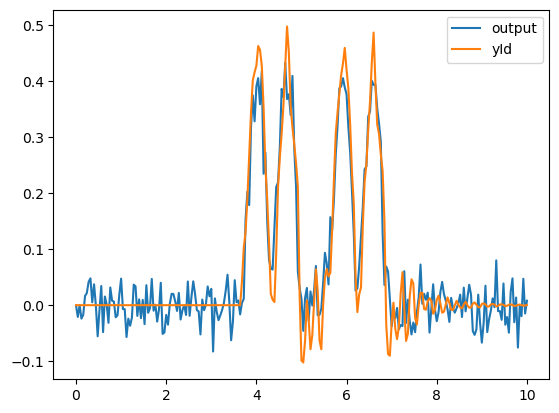

For inertial acceleration :
R2 Score: 0.9931842554211441,       MSE: 0.07326340596399787


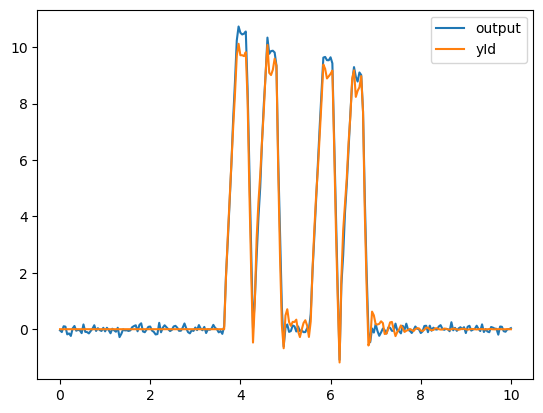

In [28]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_cicular[0], y_id_circular[0])},       MSE: {mean_squared_error(output_noised_cicular[0], y_id_circular[0])}")
plt.plot(time_circular, output_noised_cicular[0])
plt.plot(time_circular, y_id_circular[0])
plt.legend(['output', 'yId'])
plt.show()

print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_cicular[1], y_id_circular[1])},       MSE: {mean_squared_error(output_noised_cicular[1], y_id_circular[1])}")
plt.plot(time_circular, output_noised_cicular[1])
plt.plot(time_circular, y_id_circular[1])
plt.legend(['output', 'yId'])
plt.show()

## <span style="color: yellow">JTurn</span>

### Data prep and Prediction

In [29]:
data_jturn = pd.read_csv('./JTurn/jTurn_input.csv')
data_jturn.head()
data_jturn.shape

(2001, 3)

In [30]:
dp_jturn = DataPreparation(drivingProfile)

In [31]:
Time_jturn = data_jturn['samplingTime'].to_numpy()
deltaSteer_jturn = data_jturn['Drv_DeltaSteer'].to_numpy()
Vx_jturn = data_jturn['Veh_Vx'].to_numpy()

In [32]:
[time_jturn, output_jturn] = (dp.getOutput(Time_jturn, deltaSteer_jturn, Vx_jturn))
[time_jturn, input_jturn] = (dp.getInput(Time_jturn, deltaSteer_jturn, Vx_jturn))
output_jturn = np.array(output_jturn)
output_noised_jturn = output_jturn + fset.white_noise_var(len(output_jturn[0]), [0.001, 0.01])
input_jturn = np.array(input_jturn)

In [33]:
x_id_jturn, y_id_jturn = modelObj.predict(sysId_noised, input_jturn)

### Metrics

For yaw rate :
R2 Score: 0.8729390757836556,       MSE: 0.0011296475487978495


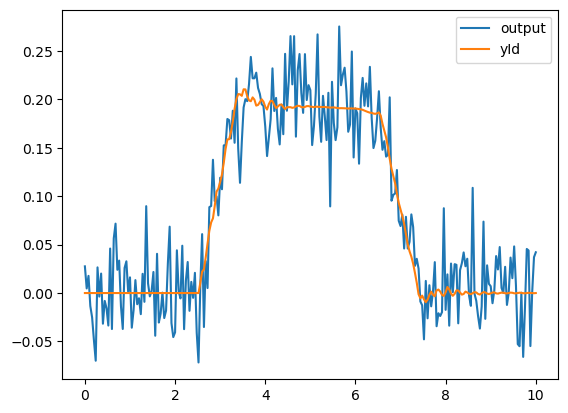

For inertial acceleration :
R2 Score: 0.9957406405322687,       MSE: 0.02213787618698999


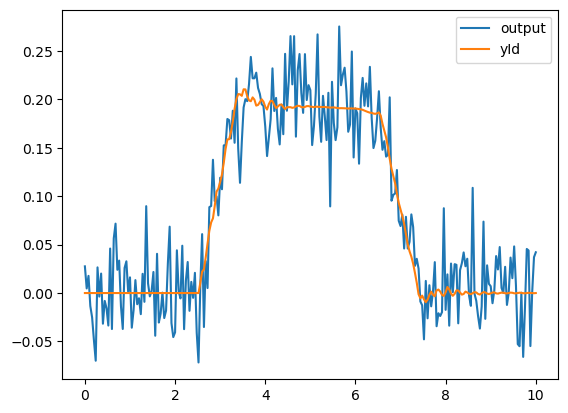

In [34]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_jturn[0], y_id_jturn[0])},       MSE: {mean_squared_error(output_noised_jturn[0], y_id_jturn[0])}")
plt.plot(time_jturn, output_noised_jturn[0])
plt.plot(time_jturn, y_id_jturn[0])
plt.legend(['output', 'yId'])
plt.show()

print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_jturn[1], y_id_jturn[1])},       MSE: {mean_squared_error(output_noised_jturn[1], y_id_jturn[1])}")
plt.plot(time_jturn, output_noised_jturn[0])
plt.plot(time_jturn, y_id_jturn[0])
plt.legend(['output', 'yId'])
plt.show()

## <span style="color: cyan">VDA</span>

### Data Prep and Prediction

In [35]:
data_vda = pd.read_csv('./VDA/VDA_input.csv')
data_vda.head()
data_vda.shape

(1801, 3)

In [36]:
dp_vda = DataPreparation(drivingProfile)

In [37]:
Time_vda = data_vda['samplingTime'].to_numpy()
deltaSteer_vda = data_vda['Drv_DeltaSteer'].to_numpy()
Vx_vda = data_vda['Veh_Vx'].to_numpy()

In [38]:
[time_vda, output_vda] = (dp.getOutput(Time_vda, deltaSteer_vda, Vx_vda))
[time_vda, input_vda] = (dp.getInput(Time_vda, deltaSteer_vda, Vx_vda))
output_vda = np.array(output_vda)
output_noised_vda = output_vda + fset.white_noise_var(len(output_vda[0]), [0.001, 0.01])
input_vda = np.array(input_vda)

In [39]:
x_id_vda, y_id_vda = modelObj.predict(sysId_noised, input_vda)

### Metrics

For yaw rate :
R2 Score: 0.9855472184623414,       MSE: 0.0018872564075950035


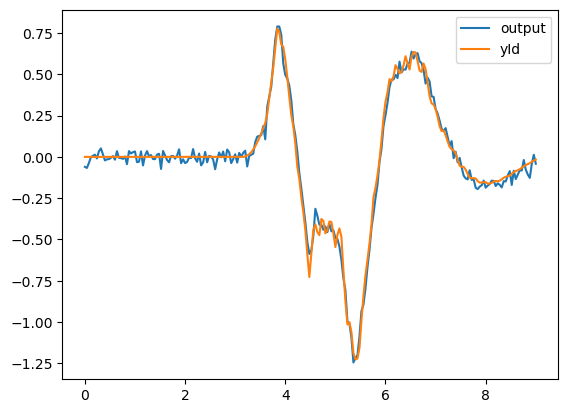

For inertial acceleration :
R2 Score: 0.9991242219624897,       MSE: 0.050139821516996835


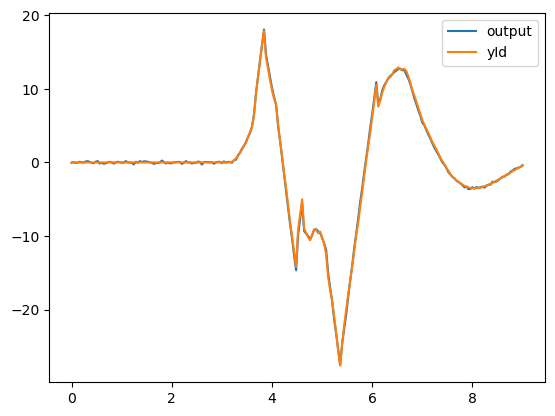

In [40]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_vda[0], y_id_vda[0])},       MSE: {mean_squared_error(output_noised_vda[0], y_id_vda[0])}")
plt.plot(time_vda, output_noised_vda[0])
plt.plot(time_vda, y_id_vda[0])
plt.legend(['output', 'yId'])
plt.show()

print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_vda[1], y_id_vda[1])},       MSE: {mean_squared_error(output_noised_vda[1], y_id_vda[1])}")
plt.plot(time_vda, output_noised_vda[1])
plt.plot(time_vda, y_id_vda[1])
plt.legend(['output', 'yId'])
plt.show()